Keerthi Gouni - Supermarket_sales analysis project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving supermarket_sales.csv to supermarket_sales.csv


In [4]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename from the upload
df = pd.read_csv('supermarket_sales.csv')

# Display the first few rows
df.head()

,InvoiceID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5percentage,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Introduction to dataset

Reading the dataset

In [5]:
# df = pd.read_csv(dataset_path)
# print(df)

df = pd.read_csv('supermarket_sales.csv')
print(df)

       InvoiceID Branch       City Customertype  Gender  \
0    750-67-8428      A     Yangon       Member  Female   
1    226-31-3081      C  Naypyitaw       Normal  Female   
2    631-41-3108      A     Yangon       Normal    Male   
3    123-19-1176      A     Yangon       Member    Male   
4    373-73-7910      A     Yangon       Normal    Male   
..           ...    ...        ...          ...     ...   
995  233-67-5758      C  Naypyitaw       Normal    Male   
996  303-96-2227      B   Mandalay       Normal  Female   
997  727-02-1313      A     Yangon       Member    Male   
998  347-56-2442      A     Yangon       Normal    Male   
999  849-09-3807      A     Yangon       Member  Female   

                Productline  Unitprice  Quantity  Tax5percentage      Total  \
0         Health and beauty      74.69         7         26.1415   548.9715   
1    Electronic accessories      15.28         5          3.8200    80.2200   
2        Home and lifestyle      46.33         7      

Revealing the basic info about the train dataset and optimizing dtypes of variables to reduce memory usage.

In [6]:
#Checking the Dimension of Data
print(df.shape)

#Checking the first 5 rows as to how data looks.
df.head()

(1000, 17)


,InvoiceID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5percentage,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
# Describing Data

df.describe()

,Unitprice,Quantity,Tax5percentage,Total,cogs,grossmarginpercentage,grossincome,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


2.Cleaning Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InvoiceID              1000 non-null   object 
 1   Branch                 1000 non-null   object 
 2   City                   1000 non-null   object 
 3   Customertype           1000 non-null   object 
 4   Gender                 1000 non-null   object 
 5   Productline            1000 non-null   object 
 6   Unitprice              1000 non-null   float64
 7   Quantity               1000 non-null   int64  
 8   Tax5percentage         1000 non-null   float64
 9   Total                  1000 non-null   float64
 10  Date                   1000 non-null   object 
 11  Time                   1000 non-null   object 
 12  Payment                1000 non-null   object 
 13  cogs                   1000 non-null   float64
 14  grossmarginpercentage  1000 non-null   float64
 15  gross

In [9]:
# As non-null values are present in the dataset so we can proceed with this dataset

In [10]:
# checking and aggregating null values
df.isnull().sum()

,0
InvoiceID,0
Branch,0
City,0
Customertype,0
Gender,0
Productline,0
Unitprice,0
Quantity,0
Tax5percentage,0
Total,0


Removing Invoice Column as it is not usefull in our Analysis

In [12]:
df=df.drop(['InvoiceID'],axis=1)

In [13]:
#checking that the Invoice Column is removed Successfully or not!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 1000 non-null   object 
 1   City                   1000 non-null   object 
 2   Customertype           1000 non-null   object 
 3   Gender                 1000 non-null   object 
 4   Productline            1000 non-null   object 
 5   Unitprice              1000 non-null   float64
 6   Quantity               1000 non-null   int64  
 7   Tax5percentage         1000 non-null   float64
 8   Total                  1000 non-null   float64
 9   Date                   1000 non-null   object 
 10  Time                   1000 non-null   object 
 11  Payment                1000 non-null   object 
 12  cogs                   1000 non-null   float64
 13  grossmarginpercentage  1000 non-null   float64
 14  grossincome            1000 non-null   float64
 15  Ratin

In [15]:
print(df.columns.tolist())

['Branch', 'City', 'Customertype', 'Gender', 'Productline', 'Unitprice', 'Quantity', 'Tax5percentage', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'grossmarginpercentage', 'grossincome', 'Rating']


In [16]:
df.columns = df.columns.str.strip()

In [17]:
print([col for col in df.columns if 'gross' in col.lower()])

['grossmarginpercentage', 'grossincome']


In [19]:
df.columns = df.columns.str.strip()  # clean column names
df['grossmarginpercentage']  # now this should work

,grossmarginpercentage
0,4.761905
1,4.761905
2,4.761905
3,4.761905
4,4.761905
...,...
995,4.761905
996,4.761905
997,4.761905
998,4.761905


In [20]:
# This describe which row in the DataFrame is duplicated or not
df.duplicated().value_counts()

,count
False,1000


As we do not have any null values and duplicate values we can now go ahead and convert the column values into their Corresponding data types

In [21]:
df['Date']=pd.to_datetime(df['Date'])

In [22]:
df['Time']=pd.to_datetime(df['Time'])

<ipython-input-22-ca8834d81e24>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [23]:
# Reviewing our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Branch                 1000 non-null   object        
 1   City                   1000 non-null   object        
 2   Customertype           1000 non-null   object        
 3   Gender                 1000 non-null   object        
 4   Productline            1000 non-null   object        
 5   Unitprice              1000 non-null   float64       
 6   Quantity               1000 non-null   int64         
 7   Tax5percentage         1000 non-null   float64       
 8   Total                  1000 non-null   float64       
 9   Date                   1000 non-null   datetime64[ns]
 10  Time                   1000 non-null   datetime64[ns]
 11  Payment                1000 non-null   object        
 12  cogs                   1000 non-null   float64       
 13  gros

In [ ]:
# Now our data is clean and is ready to be used in the Analysis Phase

3. Analysis

Checking how many males and how many are female in our data

In [24]:
df['Gender'].value_counts()

,count
Gender,
Female,501
Male,499


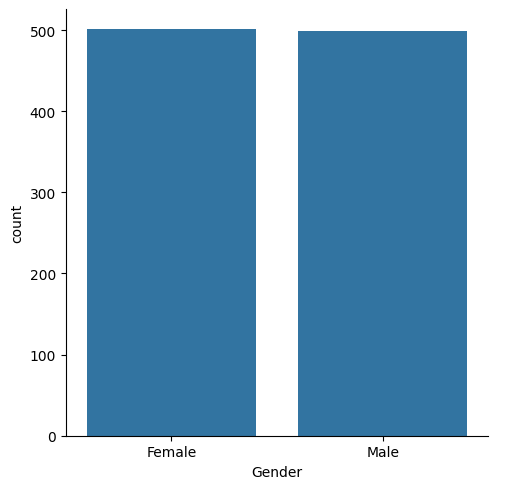

In [25]:
sns.catplot(x='Gender',kind='count',data= df)
sns.set(rc={'figure.figsize':(5,7)},palette='Paired')

Analyzing the customer rating column

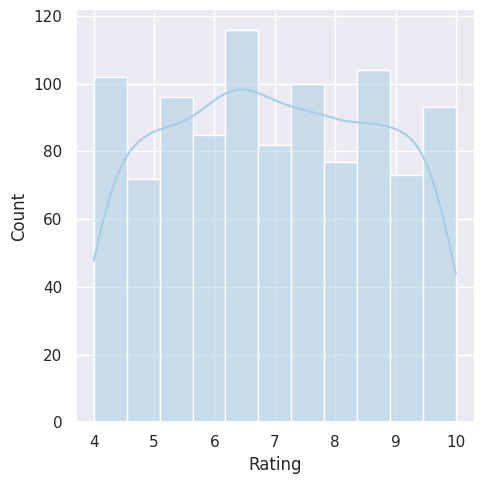

In [26]:
sns.displot(x='Rating',data=df,kde=True)
plt.show()

The distribution seems to be almost uniform with a slight deviation from the normal.Lets check the skewness of the distribution using skew function of pandas library

In [27]:
df['Rating'].skew()

np.float64(0.00900964876573073)

In [28]:
#A skewnwss of 0.009 is very low and so the distribution can be said to be unskewed.

Now i want to check the aggregate sales across the branches

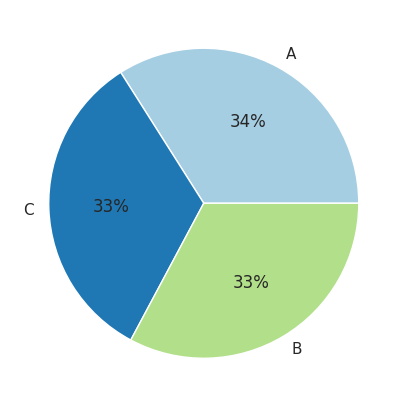

In [29]:
plt.pie(df['Branch'].value_counts(),labels=df['Branch'].unique(),autopct='%0.0f%%')
plt.show()

The pie chart represents the relative amount of total sales happening across branches A,B AND C.All three of these branches seem to be fairing well in thier respective locations.

Lets see what is the most popular payment method used by customers

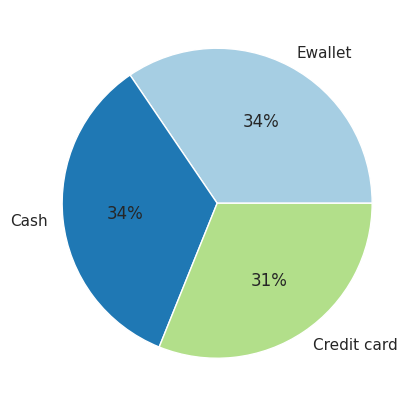

In [30]:
plt.pie(df['Payment'].value_counts(),labels=df['Payment'].unique(),autopct='%0.0f%%')
plt.show()

In [31]:
#E-wallet and Cash are the most used methods.

Does gross income affect customer rating?

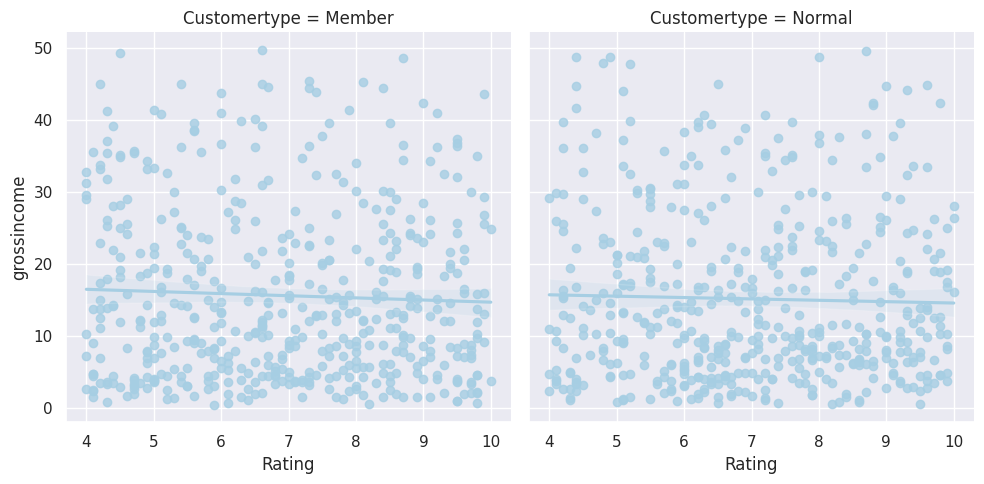

In [33]:
sns.lmplot(x='Rating',y='grossincome',data=df,col='Customertype')


The linier model plot gives a scatter plot along with a linier model approximation of the data points .From the plot it seems like there is no relation between customers rating and the income the store generates on the order.

Untill Now there are no interrelated insights, from which we can conclude or manupulate things upon.

Lets Check ,which is the most profitable branch?

<Axes: xlabel='Branch', ylabel='grossincome'>

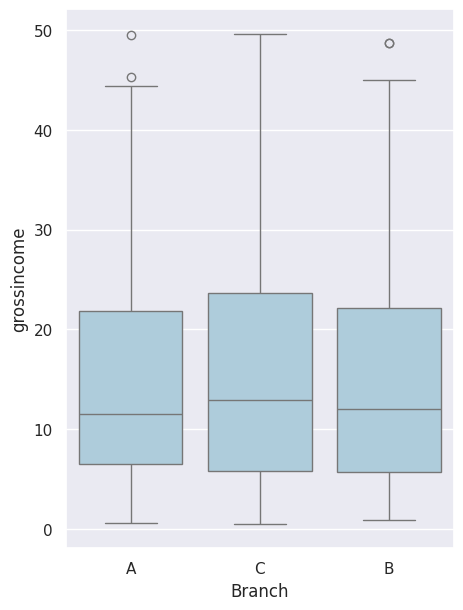

In [34]:
sns.boxplot(x=df['Branch'],y=df['grossincome'])

Relationship between Gender and Gross Income

<Axes: xlabel='Gender', ylabel='grossincome'>

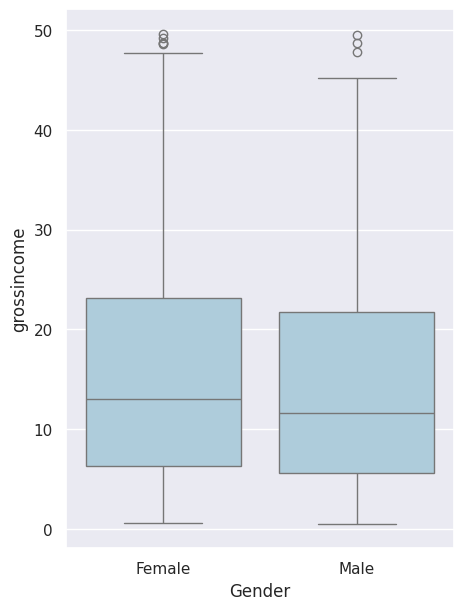

In [36]:
sns.boxplot(x='Gender',y='grossincome',data=df)

In [37]:
#Gross income is similar for both male and female customers but there is a slightly higher mean of income generated from female.


Trend in gross income

(array([17897., 17911., 17928., 17942., 17956., 17970., 17987.]),
 [Text(17897.0, 0, '2019-01-01'),
  Text(17911.0, 0, '2019-01-15'),
  Text(17928.0, 0, '2019-02-01'),
  Text(17942.0, 0, '2019-02-15'),
  Text(17956.0, 0, '2019-03-01'),
  Text(17970.0, 0, '2019-03-15'),
  Text(17987.0, 0, '2019-04-01')])

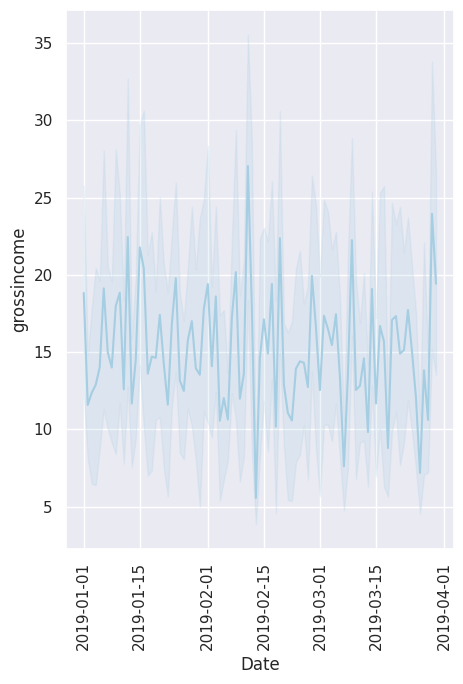

In [38]:
sns.lineplot(x=df.Date,y=df['grossincome'])
plt.xticks(rotation=90)

Which product line generates the most income?

In [39]:
df.head()

,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5percentage,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-05-07 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-05-07 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-05-07 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-05-07 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-05-07 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


Which product line helps generate the most income?

In [41]:
totalsales=df[["Productline","grossincome"]].groupby(['Productline'],as_index= False).sum().sort_values(by= 'grossincome',ascending= False)
totalsales

,Productline,grossincome
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Sports and travel'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Fashion accessories'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

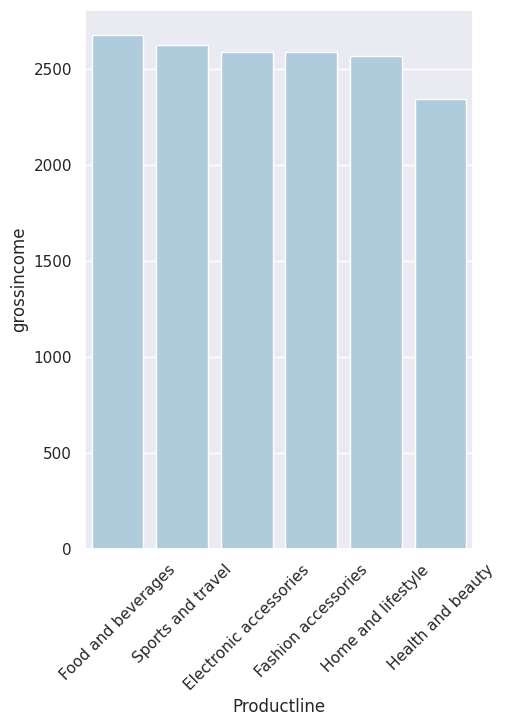

In [42]:
sns.barplot(x='Productline',y='grossincome',data=totalsales)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=45)

Spending pattern of both males and females(which category do they spend more)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

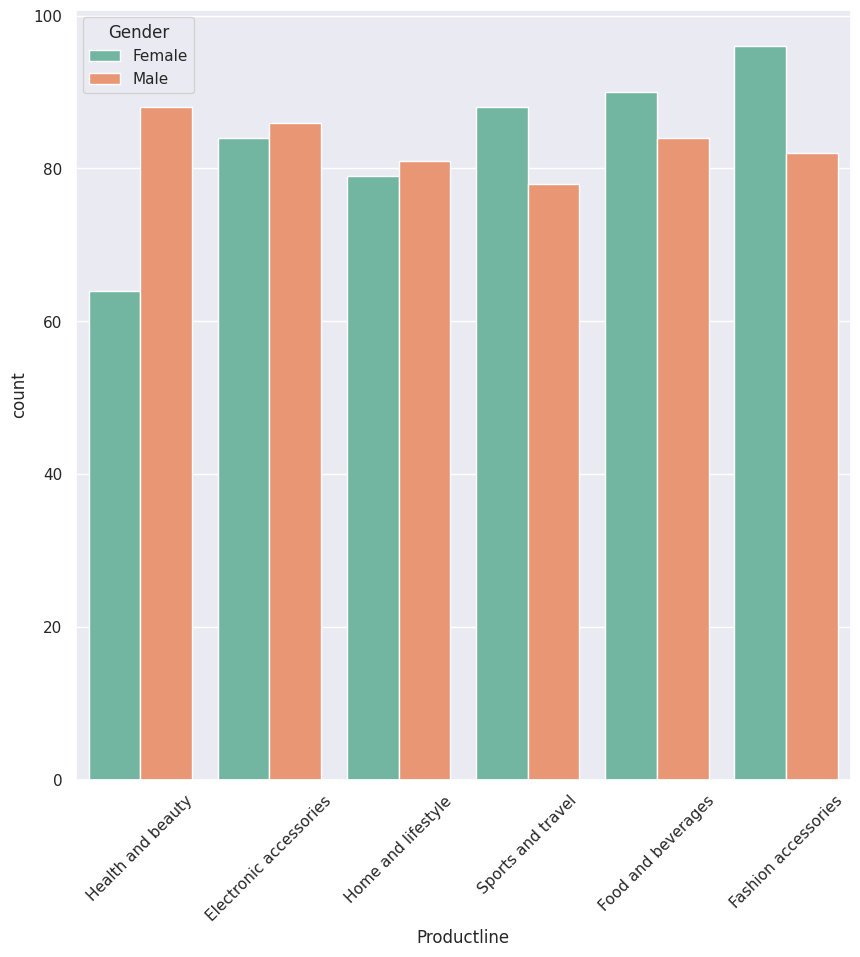

In [44]:
sns.countplot(data=df, x='Productline', hue='Gender', palette='Set2')
plt.xticks(rotation=45)

Which day of the week has maximum sales?

In [45]:
df['day'] = df['Date'].dt.day_name()   #to get the day of the date column
df.head()

,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5percentage,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating,day
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-05-07 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-05-07 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-05-07 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-05-07 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-05-07 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday


<Axes: xlabel='day', ylabel='grossincome'>

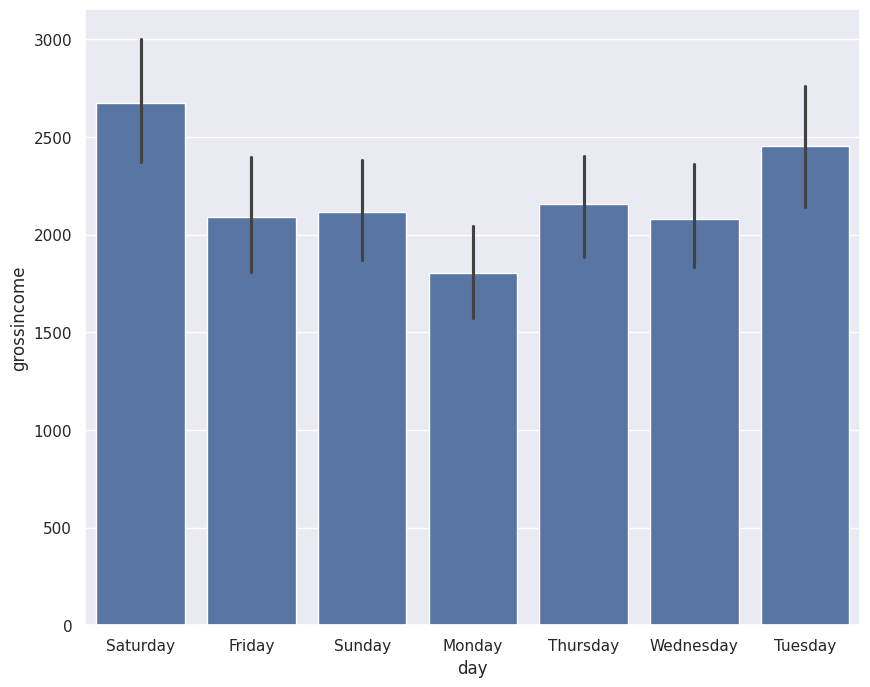

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(x='day',y='grossincome',data=df,estimator=sum)
#using estimator=sum parameter to get the total gross income for each day in our plot rather than the mean of gross income


Now lets check which hour of the day is the busiest

In [48]:
df['Hour']=df['Time'].dt.hour
df.head()

,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5percentage,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating,day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-05-07 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-05-07 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-05-07 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-05-07 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-05-07 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10


In [49]:
hourly_customer=df['Hour'].value_counts().reset_index()
hourly_customer

,Hour,count
0,19,113
1,13,103
2,15,102
3,10,101
4,18,93
5,11,90
6,12,89
7,14,83
8,16,77
9,20,75


What product line should the supermarket focus on?
HERE WE CAN HAVE TWO APPROCHES by which we can ANSWER THIS QUESTION.

1.By looking for the highest rated product line.
2.By looking for the most sold products.

<Figure size 1200x1000 with 0 Axes>

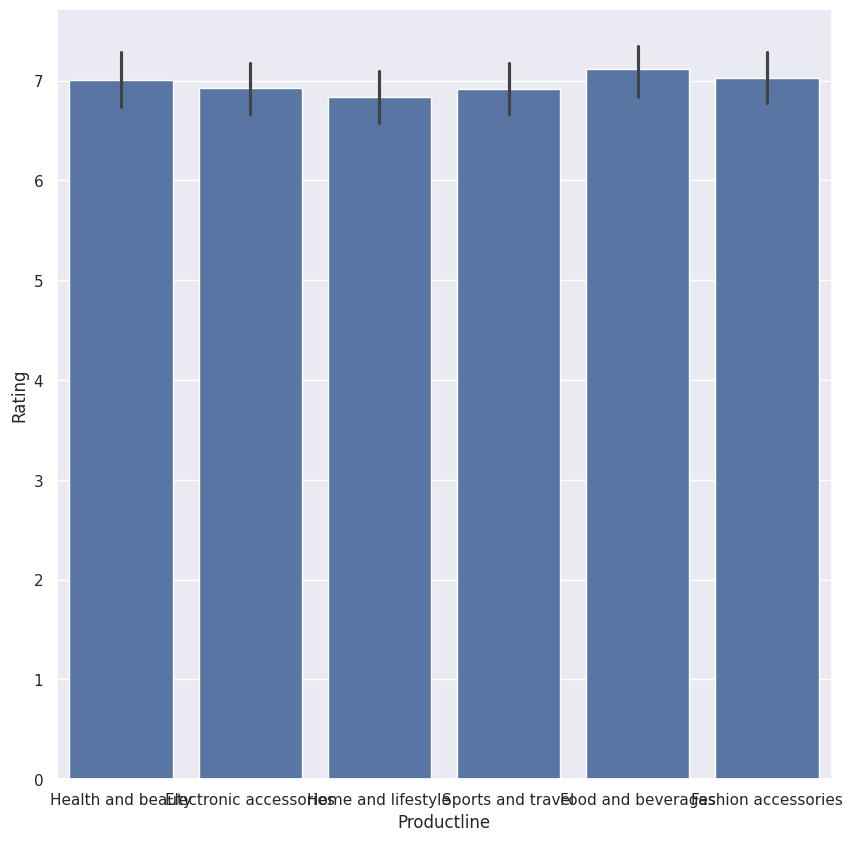

<Figure size 1200x1000 with 0 Axes>

In [53]:
sns.barplot(x='Productline',y='Rating',data=df)
plt.figure(figsize=(12,10))

<Axes: xlabel='Productline', ylabel='Quantity'>

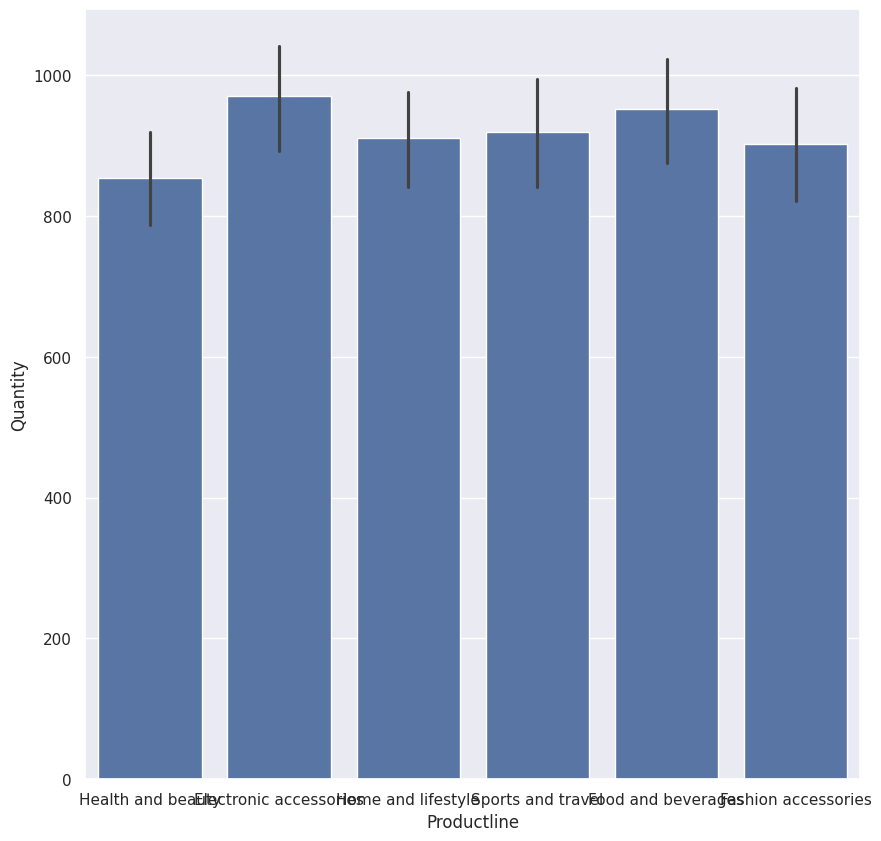

In [54]:
sns.barplot(x='Productline',y='Quantity',data=df,estimator=sum)

Now lets check where can we open a new store for expansion of the buisness

<Axes: xlabel='City', ylabel='grossincome'>

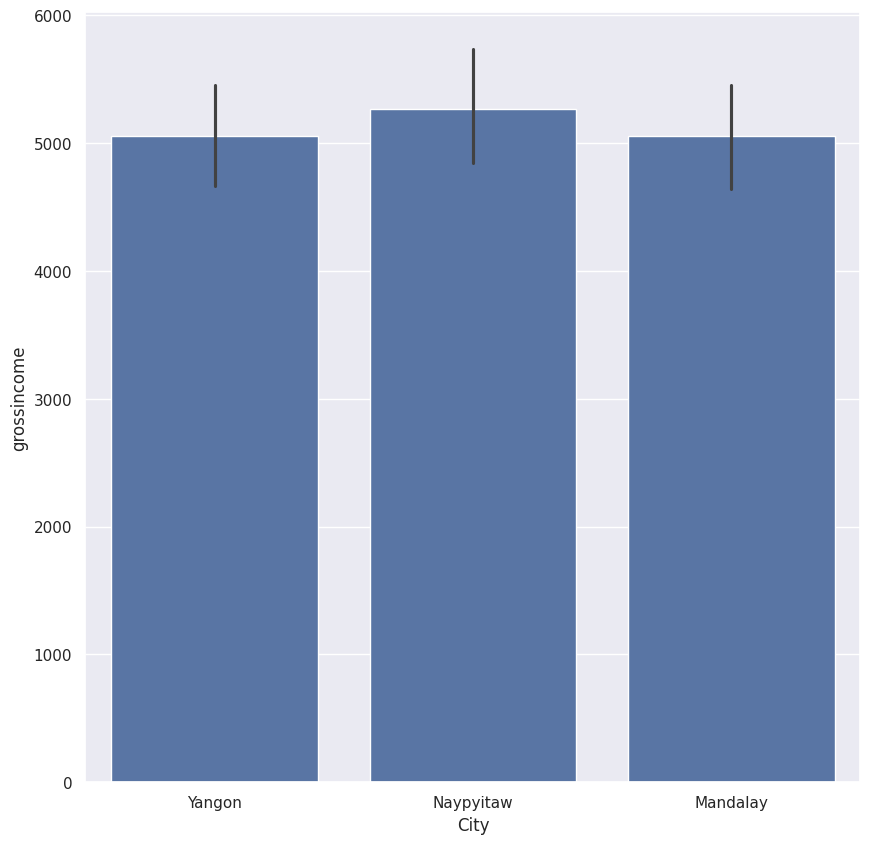

In [55]:
sns.barplot(x='City',y='grossincome',data=df,estimator=sum)

In [56]:
#Since the city NAYPYITAW has the highest mean gross income we should plan on expansion of branches in that city.


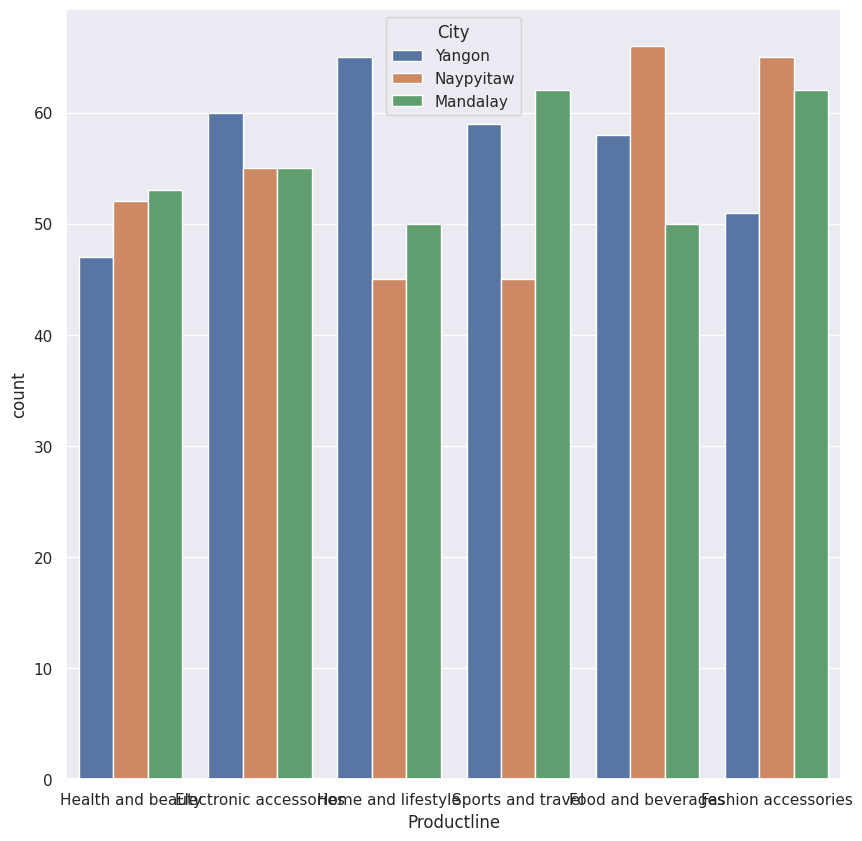

In [57]:
sns.countplot(data=df, x='Productline', hue='City')
plt.show()

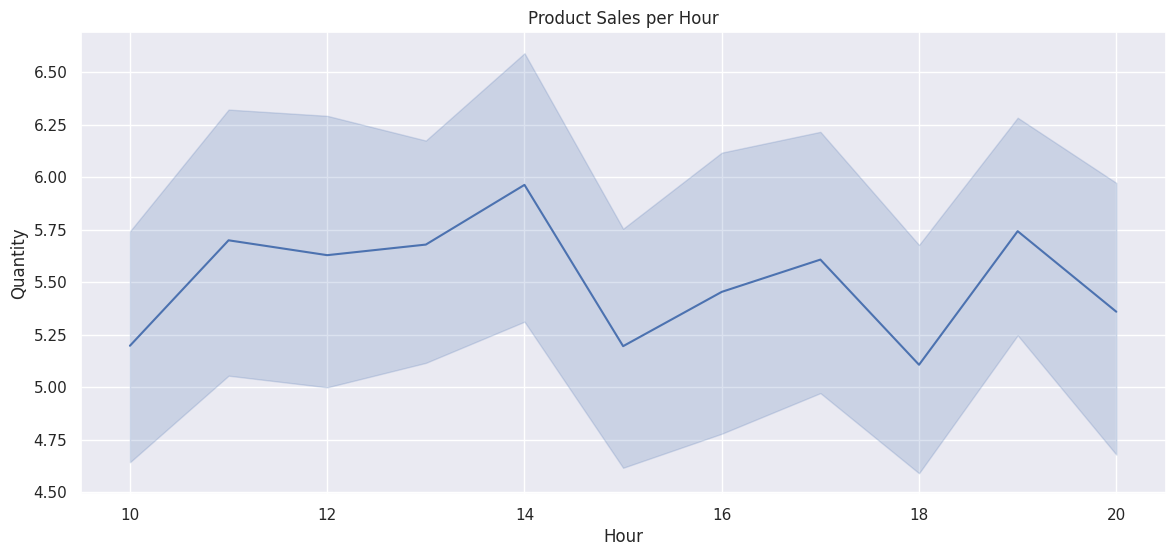

In [61]:
df["Time"]= pd.to_datetime(df["Time"])
df["Hour"]= (df["Time"]).dt.hour
plt.figure(figsize=(14,6))
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = df)
plt.title("Product Sales per Hour")
plt.show()


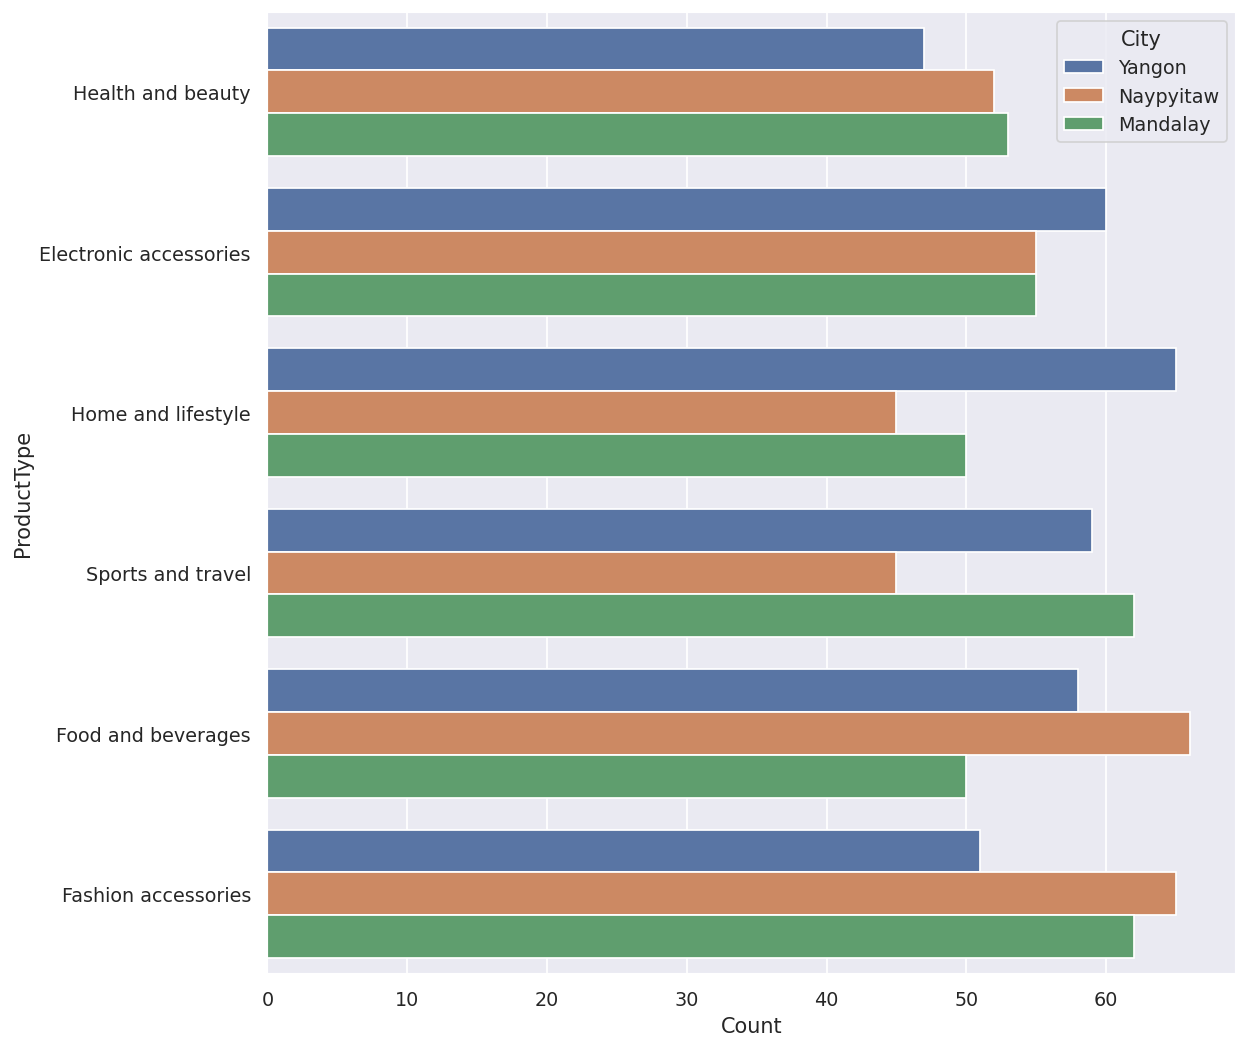

In [63]:
plt.figure(dpi=125)
sns.countplot(y ='Productline', hue = "City", data = df)
plt.xlabel('Count')
plt.ylabel('ProductType')
plt.show()

Analysis based upon gender

In [64]:
print(df.shape)
df['Gender'].value_counts()

(1000, 18)


,count
Gender,
Female,501
Male,499


<Axes: xlabel='Gender', ylabel='count'>

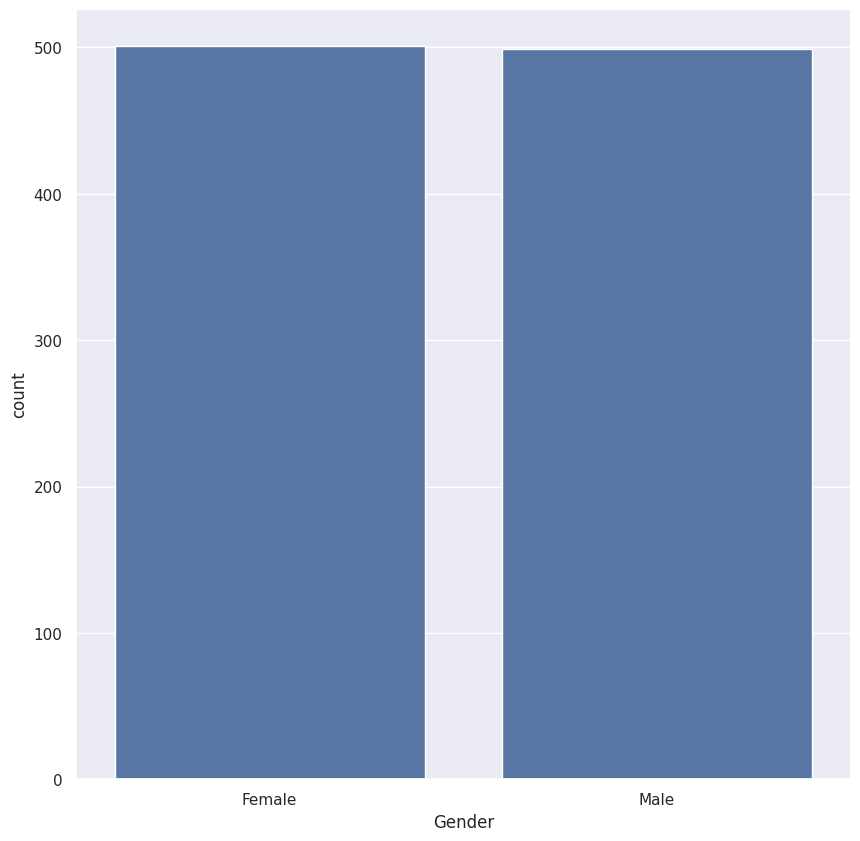

In [65]:
sns.countplot(x='Gender',data=df)

In [66]:
gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies.head()


,Female,Male
0,True,False
1,True,False
2,False,True
3,False,True
4,False,True


In [67]:
df=pd.concat([df,gender_dummies],axis=1)
df.head()

,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5percentage,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating,day,Hour,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-05-07 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13,True,False
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-05-07 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10,True,False
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-05-07 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13,False,True
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-05-07 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20,False,True
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-05-07 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10,False,True


<Axes: xlabel='Productline', ylabel='Female'>

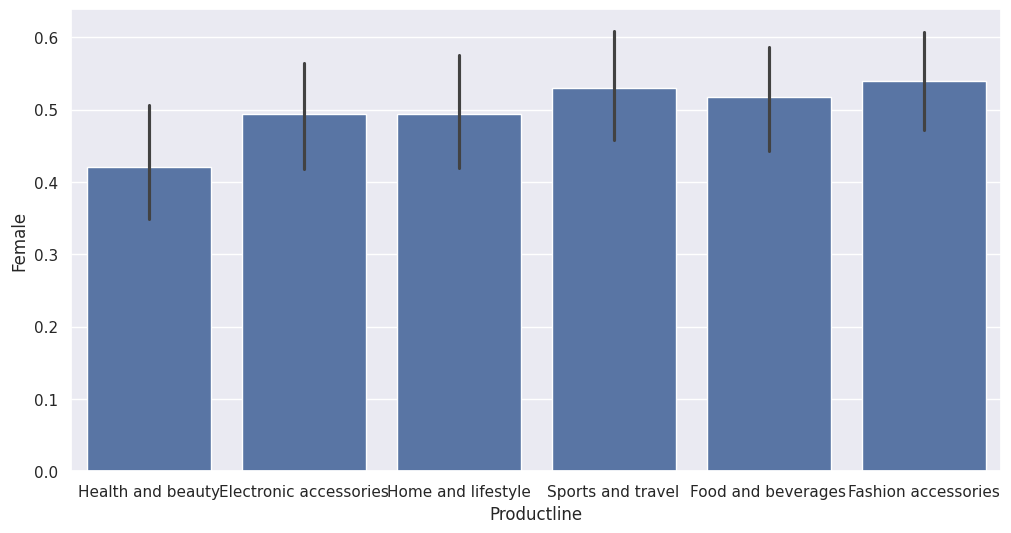

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(x="Productline",y="Female", data = df)


<Axes: xlabel='Productline', ylabel='Male'>

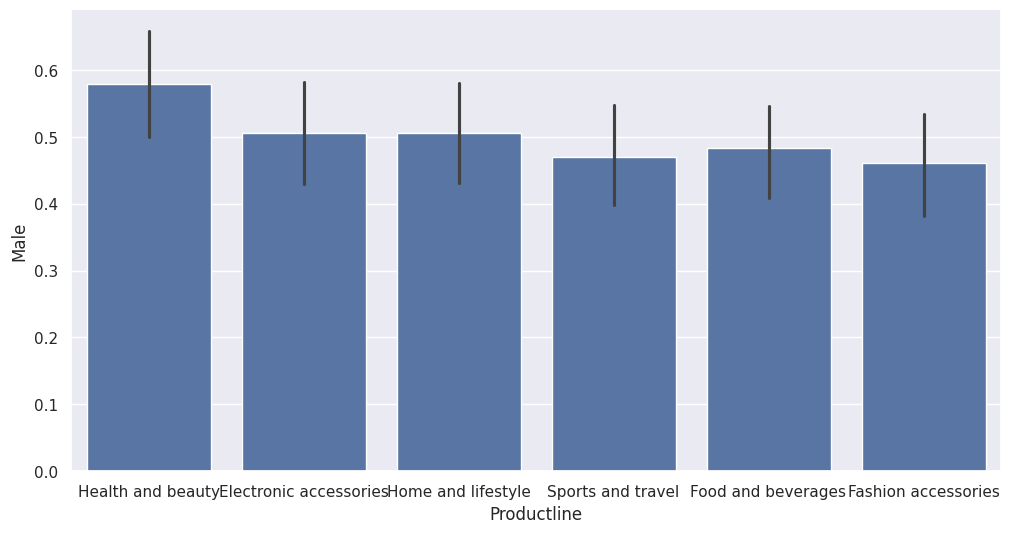

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x="Productline",y="Male", data = df)

4. Conclusions and Action to be taken

Conclusions, scope of improvement & actions to be taken
C brach has highest profit among all and females contribute to larger part of profit in all three branches.

Food and Sports gives supermarket most sales whereas health gives less sales.
males are more interested in healthcare products and least interested in fashion products females are spending more on fashion and least in sports.

As, we concluded earlier supermarket sales are least in healthcare but males are most interested in healthcare products. so this means if volume of male customers increases, the healthcare section of supermarkets can see a rise.
On mondays, sales are least & highest on saturday followed by tuesday.
So, by means like sale events or any other attracting strategy organized on low sale-scoring days like mondays can improve sales and profits.
7 PM is the busiest hour of the day
Arranging more staff around 19th hour colud help in fluency and hassle free shopping experience.
Health section have highest ratings yet lowest sales.
To improve this we have to attract more male customers.
Yangon branch have highest sales in electronics and home supplies
Mandalay branch have highest sales in sports and fashion
Napatlay branch have highest sales in food and fashion

Supermarket needs to focus on other categories that are not popular in any of three branches like healthcare and lifestyle section
We can conclude that healthcare and lifestyle sector are'nt doing well.


5. Prediction and Forcasting
we make test cases using arima library and furthermore predicting the sales for upcoming one month.



In [70]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df['cogs'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['CriticalValue (%s)'%key] = value
print(dfoutput)

Test Statistic                 -30.603524
p-value                          0.000000
Lags Used                        0.000000
Number of Observations Used    999.000000
CriticalValue (1%)              -3.436913
CriticalValue (5%)              -2.864437
CriticalValue (10%)             -2.568313
dtype: float64


In [72]:
!pip install pmdarima


from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df["cogs"], start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

print(stepwise_model.aic())


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [73]:
#importing Sarimax and passing the parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
m=SARIMAX(df['cogs'], order=(3,1,0),seasonal_order=(2,1,0,12))
res=m.fit()

In [74]:
df['arima_predict']=res.fittedvalues

In [75]:
forecast=res.predict(start=len(df),end=len(df)+35)
forecast

,predicted_mean
1000,545.795263
1001,358.519118
1002,353.130317
1003,529.710286
1004,275.063526
1005,333.480107
1006,761.341885
1007,483.866081
1008,893.202382
1009,348.586395


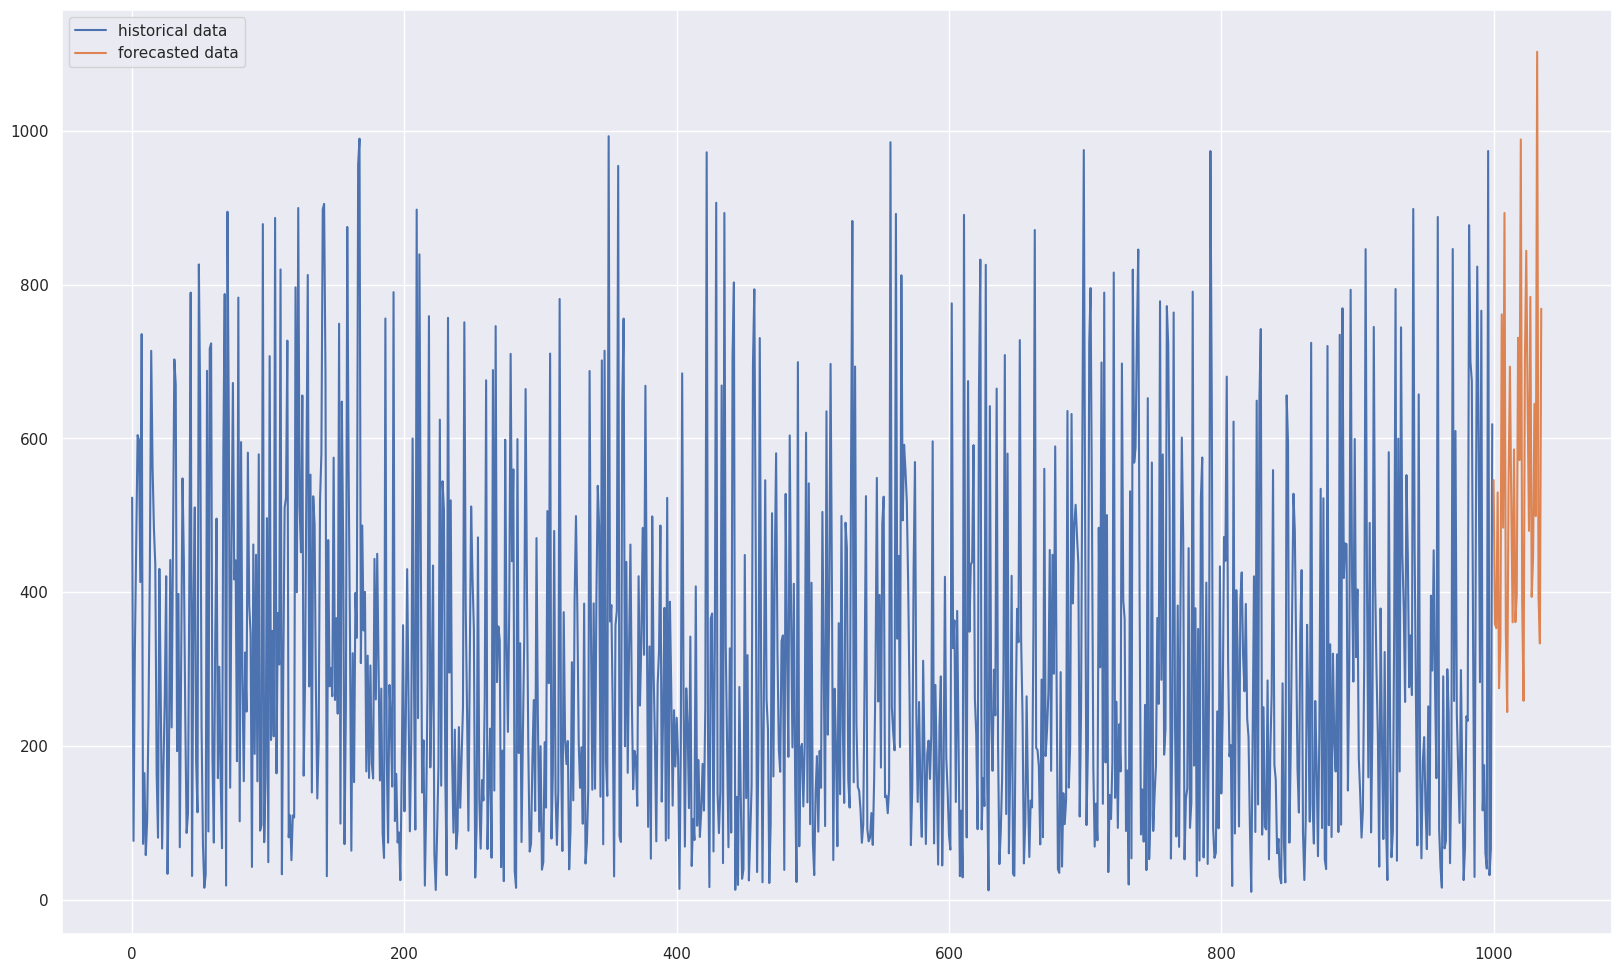

In [78]:
#plot between historical data and forecasted data
plt.figure(figsize=(20, 12))
plt.plot(df['cogs'],label="historical data")
plt.plot(forecast,label="forecasted data")
plt.legend()

From this we can clearly see Supermarket's sales are going in uptrend according to prediction for upcoming next 30 days.

This model will help Supermarket to improve thier profits, eliminate thier mistakes.

with help of EDA and Predicting libraries we have analysed data in such a way that it asks important questions and helps us in making necessary decesions based upon the fact of analysed data.